# Random Forest Classifier
Examples, and an attempt of implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.feature_selection import SelectFromModel
import sys
sys.path.append('..')
from utils import plot_counts_and_proportion, read_train_transaction, get_categorical_from_df, preprocessing

In [2]:
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target})

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [4]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


## Our data
Let's get down to business. The strategy is:
* Encode the categorical variables
* Find a way to input and mark the missing values
* Train a random forest classifier

In [5]:
train_transaction = pd.read_csv('train_transaction.csv', nrows=30000)
X, y = train_transaction.drop('isFraud', axis=1), train_transaction['isFraud']

In [6]:
X,y = read_train_transaction(nrows = 30000,folder_path = None, undersampling = False, RandomState=10)

In [7]:
X.index

Int64Index([2987000, 2987001, 2987002, 2987003, 2987004, 2987005, 2987006,
            2987007, 2987008, 2987009,
            ...
            3016990, 3016991, 3016992, 3016993, 3016994, 3016995, 3016996,
            3016997, 3016998, 3016999],
           dtype='int64', name='TransactionID', length=30000)

In [8]:
X = preprocessing(X)

In [9]:
X.shape

(30000, 711)

### Train test split
We use 80% of our data for training and 20% for test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9821666666666666


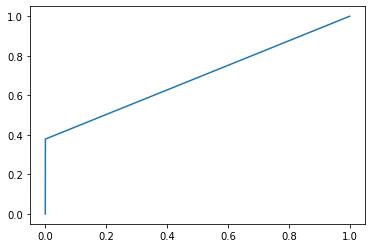

In [12]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.show()